<h1>Trading Strategy Performance Analysis</h1>
<br>
<h2>Background:</h2>
This project was born out of my passion for trading the markets. It turns out data analytics and trading go hand-in-hand. I started trading before I began high school, about 13 years ago. Back then, I used a simple pen and paper journal to document my trading process and psychology. This is far from that, as I attempt to use the skills I’ve learned in college and professionally to take a deep dive into my personal trading.<br>


<h2>Behind the Data:</h2>
Prior to this project, I created a local database using SQLite consisting of two tables. One table contains daily statistics, and the other stores individual trade statistics. I export this data from my trading platform, SierraChart, at the end of each trading day. Before importing the data, I format it using an Excel template that I created to transform it into a proper CSV format. Additionally, I append the trading data with two custom columns that describe specific aspects of my trading strategy, helping me to quantify and analyze trade types effectively. At this time I am visualizing simple metrics in Grafana through SQL queries, which does not support the level of depth I want to ultimately pursue (regression analysis, model building, etc.), which leads me into...<br>


<h2>Purpose:</h2>
I hope that this project helps me sharpen/showcase my Python capabiliites. Further, since this is a dynamic project focused on improving technical execution, this notebook will continue to evolve as new questions arise and the dataset expands.
<h3>Questions to answer:</h3>
   <li>1. Am I profitable?<br></li> 
   <li>2.....<br></li> 
   <li>3.....<br></li> 

In [40]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Connect to local SQLite database
conn = sqlite3.connect(r'C:\Users\Tyler\Documents\Trading Analytics\sc_trading.db')

In [26]:
#Retrieves all data from tables and transform into DataFrame
daily_stats = pd.read_sql_query("SELECT * FROM DailyStats", conn)
trades = pd.read_sql_query("SELECT * FROM TradeData", conn)

In [67]:
#A snapshot of the data.
daily_stats.head()

,Date,ClosedTradesProfitLossAllTrades,ClosedTradesProfitLossLongTrades,ClosedTradesProfitLossShortTrades,ClosedTradesTotalProfitAllTrades,ClosedTradesTotalProfitLongTrades,ClosedTradesTotalProfitShortTrades,ClosedTradesTotalLossAllTrades,ClosedTradesTotalLossLongTrades,ClosedTradesTotalLossShortTrades,...,LargestWinningTradeAllTrades,LargestLosingTradeAllTrades,LargestWinnerPercentOfProfitAllTrades,LargestLoserPercentOfLossAllTrades,MaxConsecutiveWinnersAllTrades,MaxConsecutiveLosersAllTrades,AverageTimeInTradesAllTrades,AverageTimeInWinningTradesAllTrades,AverageTimeInLosingTradesAllTrades,AbsError
0,2024-04-18,527.5,437.5,90.0,687.5,437.5,250.0,-160.0,0.0,-160.0,...,250.0,-160.0,36.36%,100.00%,2,0,2:21,2:09,2:57,527.5
1,2024-04-17,637.5,275.0,362.5,2262.5,975.0,1287.5,-1625.0,-700.0,-925.0,...,350.0,-212.5,15.47%,13.08%,5,4,2:40,3:32,1:48,637.5
2,2024-04-16,487.5,-537.5,1025.0,1287.5,12.5,1275.0,-800.0,-550.0,-250.0,...,712.5,-250.0,55.34%,31.25%,2,3,1:57,3:29,0:24,487.5
3,2024-04-19,-592.5,-782.5,190.0,1760.0,237.5,1522.5,-2352.5,-1020.0,-1332.5,...,800.0,-250.0,45.45%,10.63%,3,7,4:45,2:41,6:08,592.5
4,2024-04-22,552.5,-10.0,562.5,932.5,160.0,772.5,-380.0,-170.0,-210.0,...,500.0,-170.0,53.62%,44.74%,4,3,3:01,4:11,0:42,552.5


In [23]:
#A snapshot of the data.
trades.head()

,Date,Symbol,TradeType,EntryDateTime,ExitDateTime,EntryPrice,ExitPrice,TradeQuantity,MaxOpenQuantity,MaxClosedQuantity,...,TotalEfficiency,CommissionC,HighPriceWhileOpen,LowPriceWhileOpen,OpenPositionQuantity,ClosePositionQuantity,Duration,Account,DVA_location,Initial_risk
0,2025-01-27,GCG5.COMEX,Short,2025-01-27 09:01:01.000 BP,2025-01-27 09:20:42.000,2760.20,2757.10,1,3,1,...,0.564,0,2760.90,2755.40,1,2,00:19:41,APEX-82858-36,n1.n2,1
1,2025-01-27,GCG5.COMEX,Short,2025-01-27 09:02:21.000,2025-01-27 09:20:43.000 EP,2760.70,2757.10,2,3,3,...,0.436,0,2760.90,2755.40,3,0,00:18:22,APEX-82858-36,n1.n2,1
2,2025-01-27,MCLH5.NYMEX,Short,2025-01-27 11:01:25.000 BP,2025-01-27 11:08:39.000,73.52,73.25,4,5,4,...,0.844,0,73.55,73.23,4,1,00:07:14,APEX-82858-36,n3.n4,2
3,2025-01-27,MCLH5.NYMEX,Short,2025-01-27 11:01:28.000,2025-01-27 11:08:39.000 EP,73.52,73.25,1,5,5,...,0.169,0,73.55,73.23,5,0,00:07:11,APEX-82858-36,n3.n4,2
4,2025-01-27,MESH5.CME,Short,2025-01-27 10:35:43.000 BP,2025-01-27 10:35:54.000,6043.50,6044.25,5,10,5,...,-0.750,0,6044.50,6043.50,5,5,00:00:11,APEX-82858-36,p1.p2,1


In [24]:
#Calculating basic descriptive statistics. Given the data, primarily checking count to ensure no null values
trades.describe()

,EntryPrice,ExitPrice,TradeQuantity,MaxOpenQuantity,MaxClosedQuantity,ProfitLossC,CumulativeProfitLossC,FlatToFlatMaxOpenProfitC,FlatToFlatMaxOpenLossC,MaxOpenProfitC,MaxOpenLossC,EntryEfficiency,ExitEfficiency,TotalEfficiency,CommissionC,HighPriceWhileOpen,LowPriceWhileOpen,OpenPositionQuantity,ClosePositionQuantity,Initial_risk
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000
mean,5815.400390,5816.672143,2.045455,3.642857,2.870130,17.022727,29.806818,78.938312,-32.980519,54.939935,-23.993506,0.913409,0.389234,-0.009558,0.0,5820.580325,5811.895325,3.110390,0.779221,1.649351
std,6259.417463,6260.994100,1.249004,2.041013,1.810288,81.644662,137.671641,143.299869,32.304282,101.032857,22.992094,0.255658,0.302116,0.488973,0.0,6265.993966,6254.235540,1.831324,1.304826,0.478730
min,70.860000,70.660000,1.000000,1.000000,1.000000,-108.000000,-293.750000,0.000000,-196.000000,0.000000,-108.000000,0.000000,0.000000,-1.000000,0.0,71.000000,70.660000,1.000000,0.000000,1.000000
25%,73.520000,73.540000,1.000000,2.000000,1.000000,-12.000000,-29.375000,15.000000,-48.750000,10.125000,-36.000000,1.000000,0.128750,-0.293250,0.0,73.580000,73.350000,2.000000,0.000000,1.000000
50%,6037.000000,6040.000000,2.000000,3.000000,3.000000,0.000000,19.625000,41.500000,-24.000000,29.500000,-15.000000,1.000000,0.343000,0.000000,0.0,6044.375000,6034.875000,3.000000,0.000000,2.000000
75%,6088.250000,6088.437500,3.000000,5.000000,4.000000,30.000000,76.250000,102.187500,-10.000000,60.375000,-7.625000,1.000000,0.600000,0.283750,0.0,6093.250000,6085.562500,4.000000,1.000000,2.000000
max,21774.750000,21774.250000,5.000000,10.000000,10.000000,720.000000,1030.000000,1540.000000,0.000000,1060.000000,0.000000,1.000000,1.000000,1.000000,0.0,21789.000000,21769.750000,10.000000,5.000000,2.000000


In [21]:
#Calculating basic descriptive statistics. Given the data, primarily checking count to ensure no null values
daily_stats.describe()

,ClosedTradesProfitLossAllTrades,ClosedTradesProfitLossLongTrades,ClosedTradesProfitLossShortTrades,ClosedTradesTotalProfitAllTrades,ClosedTradesTotalProfitLongTrades,ClosedTradesTotalProfitShortTrades,ClosedTradesTotalLossAllTrades,ClosedTradesTotalLossLongTrades,ClosedTradesTotalLossShortTrades,ProfitFactorAllTrades,...,AverageLosingTradeAllTrades,AverageLosingTradeLongTrades,AverageLosingTradeShortTrades,AverageProfitFactorAllTrades,AverageProfitFactorLongTrades,AverageProfitFactorShortTrades,LargestWinningTradeAllTrades,LargestLosingTradeAllTrades,MaxConsecutiveWinnersAllTrades,MaxConsecutiveLosersAllTrades
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,33.950980,14.720588,19.230392,1115.313725,516.151961,599.161765,-1081.362745,-501.431373,-579.931373,4.610980,...,-112.314902,-83.220980,-105.673725,2.239608,0.963725,2.895294,378.897059,-215.838235,3.549020,4.882353
std,921.154123,512.782858,737.633769,800.802455,615.591267,670.901434,953.943618,584.509887,629.530657,14.806269,...,58.727436,65.206162,73.046791,5.540573,1.039084,10.032794,240.894075,125.948381,1.688949,3.680473
min,-2595.000000,-1190.000000,-1975.000000,0.000000,0.000000,0.000000,-4430.000000,-3230.000000,-2567.500000,0.000000,...,-260.000000,-206.670000,-260.000000,0.000000,0.000000,0.000000,0.000000,-500.000000,0.000000,0.000000
25%,-898.750000,-343.750000,-308.750000,522.000000,31.250000,37.500000,-1571.250000,-697.500000,-835.000000,0.650000,...,-154.020000,-128.305000,-151.530000,0.825000,0.000000,0.040000,180.500000,-267.500000,2.000000,2.000000
50%,302.500000,17.000000,0.000000,987.500000,290.000000,287.500000,-992.500000,-425.000000,-297.500000,1.390000,...,-114.170000,-97.500000,-100.000000,1.270000,0.730000,0.900000,350.000000,-200.000000,3.000000,5.000000
75%,571.250000,295.375000,381.250000,1687.500000,718.750000,1072.500000,-317.500000,-24.000000,-142.500000,2.265000,...,-81.450000,-11.700000,-52.680000,1.890000,1.510000,1.985000,532.500000,-143.750000,5.000000,7.000000
max,1600.000000,1365.000000,1600.000000,3045.000000,2450.000000,3000.000000,0.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,0.000000,40.000000,4.300000,71.670000,940.000000,0.000000,7.000000,16.000000


<h2>Question 1: Am I profitable?</h2>
<h2>Answer: Mostly Yes... and sometimes No depending on the time frame.</h2>
The simplest way to answer this question is to look at the daily statistics table and sum up the daily profit/loss (PnL). I chose to visualize this with a scatter plot to observe potential trends in profitability over time. To enhance the analysis, I included a date filter, which allows me to focus on specific periods of interest.<br>
<br>This is particularly useful because the size of my trading account fluctuates depending on the prop firm I am working with. By filtering for specific time frames with similarly sized accounts, I can better evaluate whether a day was "good" or "bad" based on the magnitude of profitability*. Since smaller accounts have less leverage, a strong performance day will not have the same notional value as a a strong performance day on a larger account with more leverage.<br>

<br>*The quotes are there because I have since stopped using PnL to measure if a day was good or bad. I have switched to a more process-oriented criteria related to my trading process itself. Trading has a fair amount of randomness baked into it, and PnL should not be the sole goal. This graph should only determine if I am profitable for the specified time frame, not if I am a good trader, even if the number is positive.

In [86]:
#Create Date Filter
#Convert 'Date' column to datetime format from object
daily_stats['Date'] = pd.to_datetime(daily_stats['Date'], errors='coerce')
# Define the date range for filter
start_date = '2020-02-01'
end_date = '2025-02-10'
#Create filter
filtered_stats = daily_stats[(daily_stats['Date'] >= start_date) & (daily_stats['Date'] <= end_date)]

Trading Days: 51
PnL: $1731.5 USD
Avg. PnL/Day: $34 USD


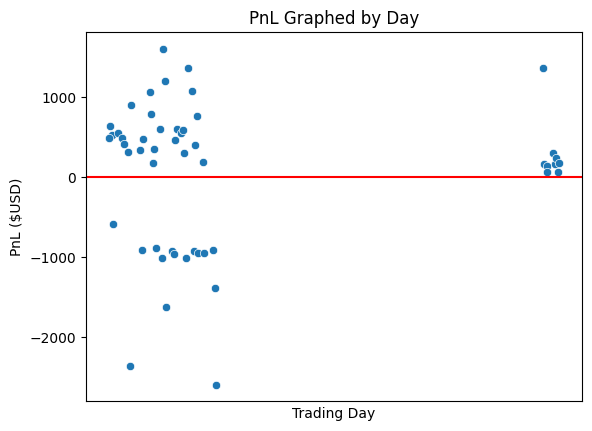

In [93]:
#PnL Graphed by Day
sns.scatterplot(x='Date', y='ClosedTradesProfitLossAllTrades', data=filtered_stats)
plt.title('PnL Graphed by Day')
plt.ylabel('PnL ($USD)')
plt.xlabel('Trading Day')
#Hide Date Label
plt.xticks([])
#Add line @ y=0 for visual reference of breakeven point
plt.axhline(y=0, color='red')
#Calculate Total Days
total_days = len(filtered_stats)
print(f"Trading Days: {total_days}")
#Calculate Total PnL
pnl = filtered_stats['ClosedTradesProfitLossAllTrades'].sum()
print(f"PnL: ${pnl} USD")
#Calculate Avg. PnL per Day
avg_pnl_day = pnl / total_days
print(f"Avg. PnL/Day: ${avg_pnl_day:.0f} USD")